# Merck Challenge
## Sequential Model-based Bayesian optimization with multi dimensional inputs, to maximize target variable

- Vanshita Gupta
- Advaith Rao

## Import packages

In [7]:
# !pip3 install bayesian-optimization
import os
# os.chdir('/Users/arao/Documents/BayesianOptimization/')
from bayes_opt import BayesianOptimization
from bayes_opt.util import UtilityFunction, Colours

In [8]:
# !pip3 install scikit-optimize
%matplotlib inline
import numpy as np
np.random.seed(237)
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from skopt.plots import plot_gaussian_process
from skopt import gp_minimize
from skopt.plots import plot_convergence
from skopt.space import Real, Integer
from skopt.utils import use_named_args

from olympus import Emulator, Dataset
from olympus.models import BayesNeuralNet
from olympus.emulators.emulator import load_emulator

# from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_val_score,train_test_split

from sklearn.metrics import r2_score

## Load our dataset

In [9]:

dataset = Dataset(kind='suzuki')
data = dataset.data

/Users/arao/Desktop/test_env/lib/python3.8/site-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


## Data Summary

In [10]:
data

,temperature,pd_mol,arbpin,k3po4,yield
0,75.0,0.5,1.0,1.5,2.4
1,75.0,0.5,1.2,1.5,4.6
2,75.0,0.5,1.5,1.5,4.3
3,75.0,0.5,1.8,1.5,4.7
4,75.0,0.5,1.0,2.0,7.0
...,...,...,...,...,...
242,90.0,5.0,1.8,2.5,69.7
243,90.0,5.0,1.0,3.0,83.5
244,90.0,5.0,1.2,3.0,86.7
245,90.0,5.0,1.5,3.0,95.2


In [11]:
data.describe()

,temperature,pd_mol,arbpin,k3po4,yield
count,247.000000,247.000000,247.000000,247.000000,247.000000
mean,82.287449,2.753036,1.372470,2.244939,36.884211
std,5.570170,1.683173,0.303856,0.561036,20.761073
min,75.000000,0.500000,1.000000,1.500000,2.400000
25%,75.000000,1.250000,1.000000,1.500000,20.700000
50%,80.000000,3.500000,1.200000,2.000000,34.400000
75%,85.000000,4.250000,1.500000,2.500000,51.000000
max,90.000000,5.000000,1.800000,3.000000,96.900000


## Split data into X and y

In [12]:
print(data)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


     temperature  pd_mol  arbpin  k3po4  yield
0           75.0     0.5     1.0    1.5    2.4
1           75.0     0.5     1.2    1.5    4.6
2           75.0     0.5     1.5    1.5    4.3
3           75.0     0.5     1.8    1.5    4.7
4           75.0     0.5     1.0    2.0    7.0
..           ...     ...     ...    ...    ...
242         90.0     5.0     1.8    2.5   69.7
243         90.0     5.0     1.0    3.0   83.5
244         90.0     5.0     1.2    3.0   86.7
245         90.0     5.0     1.5    3.0   95.2
246         90.0     5.0     1.8    3.0   96.9

[247 rows x 5 columns]


In [13]:
n_features = X.shape[1]
n_features


4

## Model Definition and Fitting

In [14]:
model = GaussianProcessRegressor()
model.fit(X,y)

GaussianProcessRegressor()

## Input Space definition

Define the space over which we test the optimum values of parameters for our model

In [15]:

space = {
   'temperature'   : (min(X['temperature'].tolist()), max(X['temperature'].tolist())),
   'pd_mol': (min(X['pd_mol'].tolist()), max(X['pd_mol'].tolist())),
   'arbpin': (min(X['arbpin'].tolist()), max(X['arbpin'].tolist())),
   'k3po4'  : (min(X['k3po4'].tolist()), max(X['k3po4'].tolist()))
}

## Objective Function Definition

In [16]:
noise_level = 0.1

# maximize
def objective(
        temperature,
        pd_mol,
        arbpin,
        k3po4
    ):
    # print(X)
    X = [[
            temperature,
            pd_mol,
            arbpin,
            k3po4
        ]]
#     if isinstance(X, list):
#       X = np.array(X)
    
#     X = X.reshape(1, -1)
    
   
    # preds = model.predict(X)
    
    # preds = preds.tolist()
    # min_index = preds.index(min(preds))

    # return  preds[min_index]
    return max(model.predict(X)) + np.random.random_sample() * noise_level

## Run Bayesian optimization with the *Gaussian Process Regressor* surrogate function and *UCB* acquision function

In [17]:
optimizer = BayesianOptimization(
    f = objective,
    pbounds = space,
    random_state = 1,
)

# res_gp = gp_minimize(objective, space, n_calls=20,noise=0.1**2,acq_func='EI', random_state=101)
# "Best score=%.4f" % res_gp.fun

In [18]:
import warnings
warnings.filterwarnings("ignore")

optimizer.maximize(
    init_points=10,
    n_iter=500,
)

|   iter    |  target   |  arbpin   |   k3po4   |  pd_mol   | temper... |
-------------------------------------------------------------------------
| 1         | 11.91     | 1.334     | 2.58      | 0.5005    | 79.53     |
| 2         | 14.88     | 1.117     | 1.639     | 1.338     | 80.18     |
| 3         | 49.56     | 1.317     | 2.308     | 2.386     | 85.28     |
| 4         | 28.95     | 1.164     | 2.817     | 0.6232    | 85.06     |
| 5         | 2.71      | 1.334     | 2.338     | 1.132     | 77.97     |
| 6         | 61.45     | 1.641     | 2.952     | 1.91      | 85.38     |
| 7         | 17.14     | 1.701     | 2.842     | 0.8827    | 75.59     |
| 8         | 7.177     | 1.136     | 2.817     | 0.9426    | 81.32     |
| 9         | 39.91     | 1.766     | 2.3       | 3.613     | 79.73     |
| 10        | 11.82     | 1.549     | 2.752     | 0.5823    | 86.25     |
| 11        | 64.19     | 1.8       | 3.0       | 2.241     | 84.56     |
| 12        | 71.75     | 1.8       | 

## Print the best values of parameters for our model

In [19]:
print(optimizer.max)

{'target': 104.85704512979447, 'params': {'arbpin': 1.8, 'k3po4': 3.0, 'pd_mol': 4.4075640425080875, 'temperature': 90.0}}


In [20]:
targets = [i['target'] for i in optimizer.res]

In [21]:
targets

[11.906109213127161,
 14.879258797987621,
 49.56000724189101,
 28.951009171374658,
 2.7097777452908214,
 61.450421167262576,
 17.140839155828605,
 7.177451705785315,
 39.91273308044571,
 11.824729697593979,
 64.19280821879109,
 71.75146825260259,
 37.96417371851375,
 9.750702594824322,
 62.880549465300874,
 4.8674414967309705,
 46.45419213340951,
 6.631607767161318,
 66.75773629809257,
 17.0011754894075,
 20.874788196402136,
 72.9333353361599,
 34.40625143607484,
 51.87170114334562,
 82.95995050312129,
 60.32078693982649,
 50.449847688987894,
 67.21035645223581,
 88.79199830137038,
 39.40311584332727,
 100.30563958244068,
 72.71244028944888,
 76.95999389615304,
 100.37067548480942,
 80.8935322351455,
 74.81987819855999,
 94.04029463804744,
 70.30883750989668,
 5.341879244331632,
 14.111442564901662,
 82.86482190312003,
 22.985897881661106,
 50.03385641320939,
 37.801828097722286,
 96.9443817666029,
 16.454787922067236,
 100.81884724239603,
 100.20134890082029,
 17.004913857082524,
 95.

## Make the convergence plot

Check the iteration number at which our function converges at the minimum value of f(x)

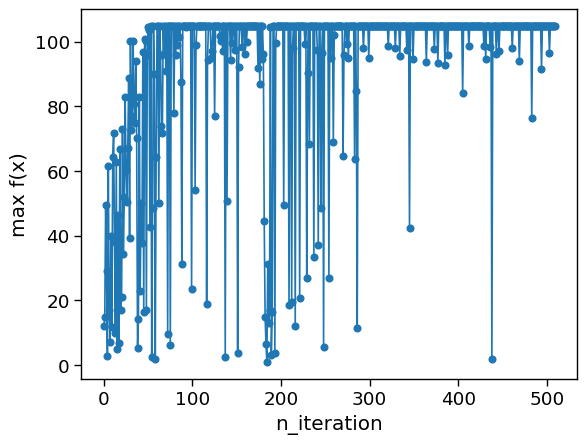

In [22]:
plt.ylabel('max f(x)')
plt.xlabel('n_iteration')
plt.plot(targets,marker = 'o')

Together these attributes can be used to visually inspect the results of the
minimization, such as the convergence trace or the acquisition function at
the last iteration:

